https://colab.research.google.com/drive/1MQnjYWk32goaI7lhvvl-gHvmx5OyopRV#scrollTo=eea31aad-99c3-48ca-83ed-028ab28c7fac

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('project3_data_articles.xlsx')

In [3]:
data.head(2)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   article_id                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

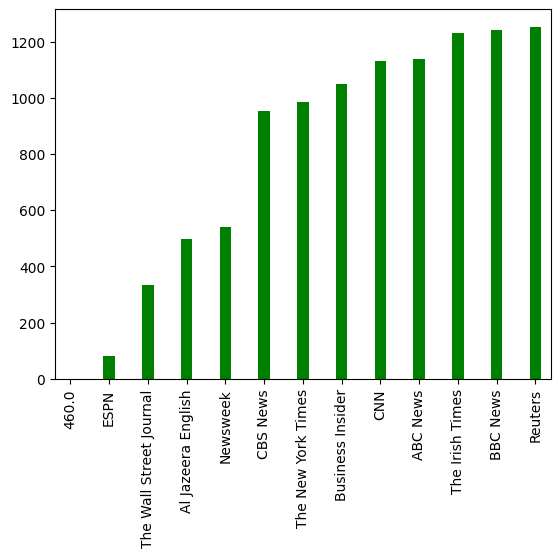

In [5]:
data['source_name'].value_counts().sort_values(ascending=True).plot(kind="bar", color='green', width=0.3)
plt.show()

In [6]:
data.groupby(['source_name'])['engagement_reaction_count'].sum().sort_values(ascending=True)

source_name
460.0                            0.0
ESPN                             0.0
Reuters                      16963.0
The Irish Times              26838.0
The Wall Street Journal      84124.0
Newsweek                     93167.0
Al Jazeera English          140410.0
Business Insider            216545.0
ABC News                    343779.0
CBS News                    459741.0
BBC News                    545396.0
The New York Times          790449.0
CNN                        1218206.0
Name: engagement_reaction_count, dtype: float64

In [7]:
data = data.drop('engagement_comment_plugin_count', axis=1)

In [8]:
# creating keyword count
def keywordflag(heading, keyword):
    try:
        if keyword in heading:
           flag = 1
        else:
           flag = 0
    except:
        flag = 0
    return flag

In [9]:
data['title'].apply(lambda x:keywordflag(x,'crash'))

0        1
1        1
2        0
3        0
4        0
        ..
10432    0
10433    0
10434    0
10435    0
10436    0
Name: title, Length: 10437, dtype: int64

In [10]:
data['keywordflag'] = data['title'].apply(lambda x:keywordflag(x,'murder'))

In [11]:
data['keywordflag'] 

0        0
1        0
2        0
3        0
4        0
        ..
10432    0
10433    0
10434    0
10435    0
10436    0
Name: keywordflag, Length: 10437, dtype: int64

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
sent_int = SentimentIntensityAnalyzer()

In [14]:
text = data['title'][5988]
text


'Dreamy, confident shows mark London Fashion Week'

In [15]:
sent = sent_int.polarity_scores(text)

In [16]:
#extract neg, pos, neu into spesific column
neg = sent['neg']
pos = sent['pos']
neu = sent['neu']
print(neg,pos,neu)

0.0 0.348 0.652


In [17]:
def get_sentiment(text,sent_int): 
  try:
    sent = sent_int.polarity_scores(text)
    return sent['neg'], sent['pos'], sent['neu']
  except:
    return 0, 0, 0

sent_int = SentimentIntensityAnalyzer()
title_sentiment = data['title'].apply(lambda x: get_sentiment(x,sent_int))
data['title_neg_sentiment'] = title_sentiment.apply(lambda x: x[0])
data['title_pos_sentiment'] = title_sentiment.apply(lambda x: x[1])
data['title_neu_sentiment'] = title_sentiment.apply(lambda x: x[2])


In [18]:
#export to excel
data.to_excel('project3_clean_data.xlsx', sheet_name='blogmedata', index=False)